# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
#1
df=pd.read_csv("https://raw.githubusercontent.com/juanhubertl8010/dataset/refs/heads/main/penguins_size.csv")#buat import csv
df.sample(10)#buat menampilkan beberapa row saja


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
143,Adelie,Dream,40.7,17.0,190.0,3725.0,MALE
219,Chinstrap,Dream,50.2,18.7,198.0,3775.0,FEMALE
281,Gentoo,Biscoe,46.2,14.9,221.0,5300.0,MALE
257,Gentoo,Biscoe,44.4,17.3,219.0,5250.0,MALE
214,Chinstrap,Dream,45.7,17.0,195.0,3650.0,FEMALE
264,Gentoo,Biscoe,50.5,15.9,222.0,5550.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,FEMALE
300,Gentoo,Biscoe,49.1,14.5,212.0,4625.0,FEMALE
254,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()#buat nyari info datasetnya
print("dataset ini terdiri dari 6 kolom dan terdapat 344 row tipe datanya ada float dan object")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
dataset ini terdiri dari 6 kolom dan terdapat 344 row tipe datanya ada float dan object


3. Show describe column and conclude what the insight is from that column

In [4]:
#3

print("Statistik yang diberikan menunjukkan ringkasan data dari empat variabel pengukuran, yaitu panjang culmen (paruh), kedalaman culmen, panjang sirip, dan massa tubuh dalam gram.")
print("Rata-rata panjang culmen adalah 43,92 mm, dengan standar deviasi 5,46 mm, yang menunjukkan sebaran data cukup bervariasi.")
print("Nilai minimum panjang culmen adalah 32,1 mm, dan maksimum 59,6 mm. Pada pengukuran massa tubuh, rata-ratanya adalah 4201,75 gram, dengan standar deviasi 801,95 gram. Sebanyak 50% dari data massa tubuh memiliki nilai di bawah 4050 gram. Nilai-nilai ini memberikan gambaran tentang sebaran ukuran dan massa tubuh hewan dalam dataset ini.")
df.describe()

Statistik yang diberikan menunjukkan ringkasan data dari empat variabel pengukuran, yaitu panjang culmen (paruh), kedalaman culmen, panjang sirip, dan massa tubuh dalam gram.
Rata-rata panjang culmen adalah 43,92 mm, dengan standar deviasi 5,46 mm, yang menunjukkan sebaran data cukup bervariasi.
Nilai minimum panjang culmen adalah 32,1 mm, dan maksimum 59,6 mm. Pada pengukuran massa tubuh, rata-ratanya adalah 4201,75 gram, dengan standar deviasi 801,95 gram. Sebanyak 50% dari data massa tubuh memiliki nilai di bawah 4050 gram. Nilai-nilai ini memberikan gambaran tentang sebaran ukuran dan massa tubuh hewan dalam dataset ini.


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
species_Adelie = df[df['species'] == 'Adelie']
species_Gentoo = df[df['species'] == 'Gentoo']
species_Chinstrap = df[df['species'] == 'Chinstrap']
island_Biscoe = df[df['island'] == 'Biscoe']
island_Dream = df[df['island'] == 'Dream']
island_Torgersen = df[df['island'] == 'Torgersen']
sex_Male = df[df['sex'] == 'MALE']
sex_Female = df[df['sex'] == 'FEMALE']
sex_nan = df[df['sex'].isna()]
sex_titik = df[df['sex'] == '.']
print("Species")
print("Adelie:", species_Adelie.shape[0])
print("Gentoo:", species_Gentoo.shape[0])
print("Chinstrap:", species_Chinstrap.shape[0])
print("island")
print("Biscoe:", island_Biscoe.shape[0])
print("Dream:", island_Dream.shape[0])
print("Torgersen:", island_Torgersen.shape[0])
print("sex")
print("Male:",sex_Male.shape[0] )
print("Female:",sex_Female.shape[0] )
print("Nan:", sex_nan.shape[0])
print(".:", sex_titik.shape[0])

Species
Adelie: 152
Gentoo: 124
Chinstrap: 68
island
Biscoe: 168
Dream: 124
Torgersen: 52
sex
Male: 168
Female: 165
Nan: 10
.: 1


5. Null handling

In [6]:
df.dropna(inplace=True)#buat ngedrop missing value
df.isna().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

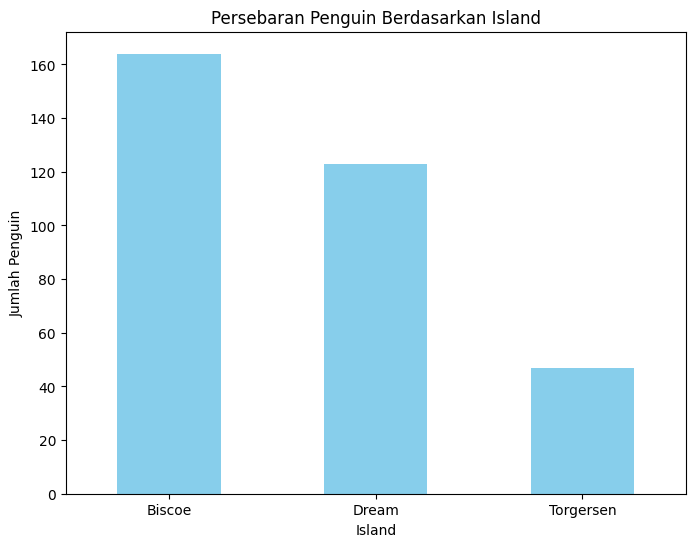

Pinguin paling banyak berada di pulau Biscoe. Pinguin paling sedikit berada di pulau Torgersen


In [7]:
#6
# Menghitung jumlah penguin di setiap pulau
island_counts = df['island'].value_counts()

plt.figure(figsize=(8,6))
island_counts.plot(kind='bar', color='skyblue')#Membuat barchart (isi datanya)
plt.title('Persebaran Penguin Berdasarkan Island')
plt.xlabel('Island')
plt.ylabel('Jumlah Penguin')
plt.xticks(rotation=0)
plt.show()
print("Pinguin paling banyak berada di pulau Biscoe. Pinguin paling sedikit berada di pulau Torgersen")

7. Check unique value of our target variable

In [8]:
unique_species = df['species'].unique() #ngecek unique value
print(unique_species)

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [9]:
#8

encoder = LabelEncoder()#encode buat ganti string/object jadi bentuk angka

df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'])


df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [10]:
#9
encoder = LabelEncoder()#encode buat ganti string/object jadi bentuk angka

df['species'] = encoder.fit_transform(df['species'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

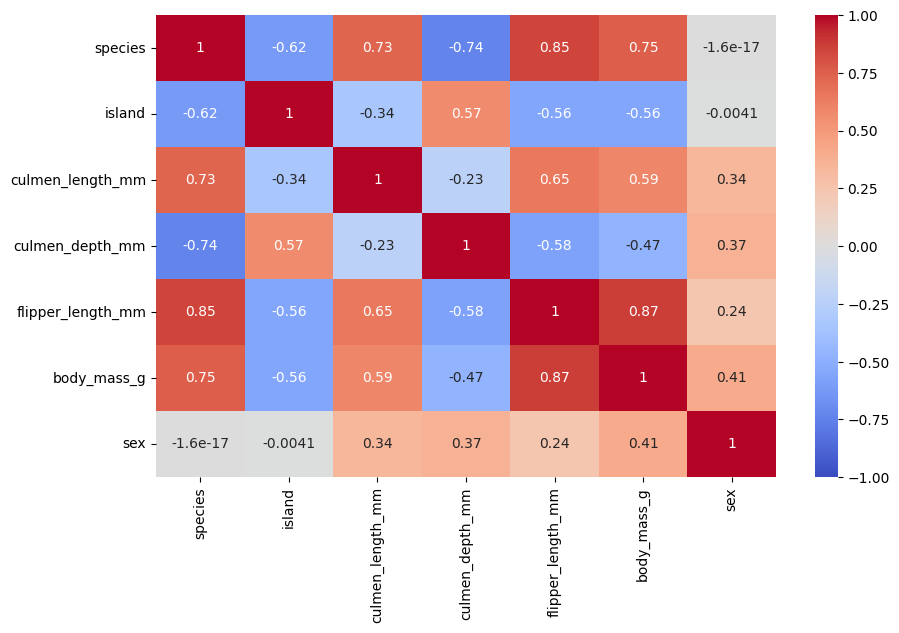

species memiliki korelasi positif kuat dengan flipper_length_mm (0.85) dan body_mass_g (0.75), artinya spesies penguin cenderung berbeda berdasarkan ukuran sirip dan massa tubuh.
culmen_depth_mm dan flipper_length_mm memiliki korelasi negatif (-0.58), menunjukkan bahwa penguin dengan kedalaman paruh yang lebih besar cenderung memiliki sirip yang lebih pendek.


In [11]:
#10
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.show()
print("species memiliki korelasi positif kuat dengan flipper_length_mm (0.85) dan body_mass_g (0.75), artinya spesies penguin cenderung berbeda berdasarkan ukuran sirip dan massa tubuh.")
print("culmen_depth_mm dan flipper_length_mm memiliki korelasi negatif (-0.58), menunjukkan bahwa penguin dengan kedalaman paruh yang lebih besar cenderung memiliki sirip yang lebih pendek.")

## Machine Learning

1. Splitting X and y

In [13]:
#1
x = df[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']
#buat ngesplit x dan y (x itu kriteria dan y yang dicari)

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [14]:
#2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#buat bikin train test

In [16]:
#3
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (267, 6)
X_test shape: (67, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [17]:
#Criterion Entropy
#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [18]:
#b
y_pred_en = clf_en.predict(x_test)

In [19]:
#c
print("Model accuracy  score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test,y_pred_en)))

Model accuracy  score with criterion entropy: 0.9701


In [20]:
#d
print("Training set score: {0:0.4f}".format(clf_en.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_en.score(x_test,y_test)))

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

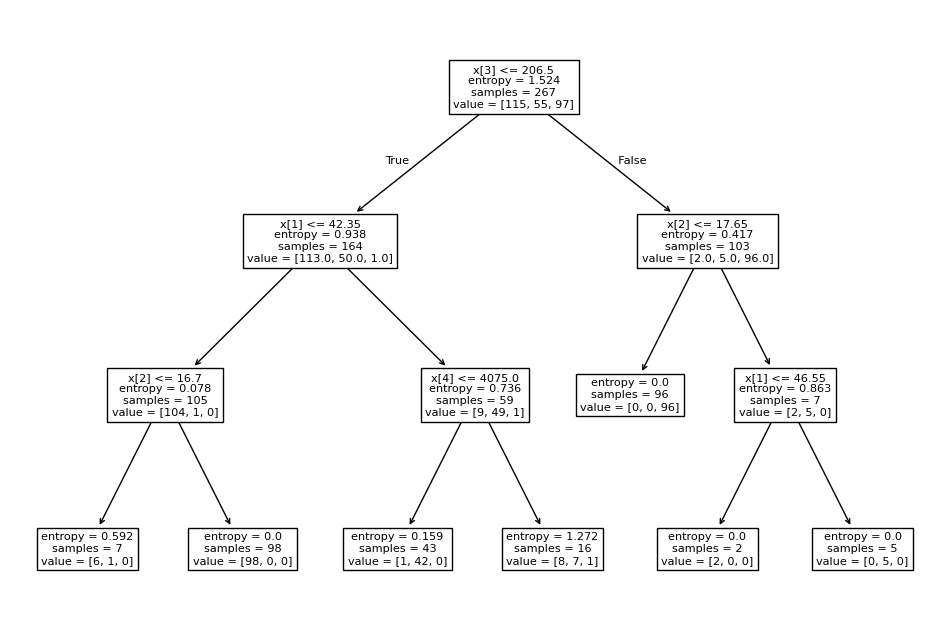

In [21]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(x_train,y_train))

2. Criterion Gini index

In [22]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
#b
y_pred_gini = clf_gini.predict(x_test)

In [24]:
#c
print("Model accuracy  score with criterion gini: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy  score with criterion gini: 0.9851


In [25]:
#d
print("Training set score: {0:0.4f}".format(clf_gini.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(x_test,y_test)))

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

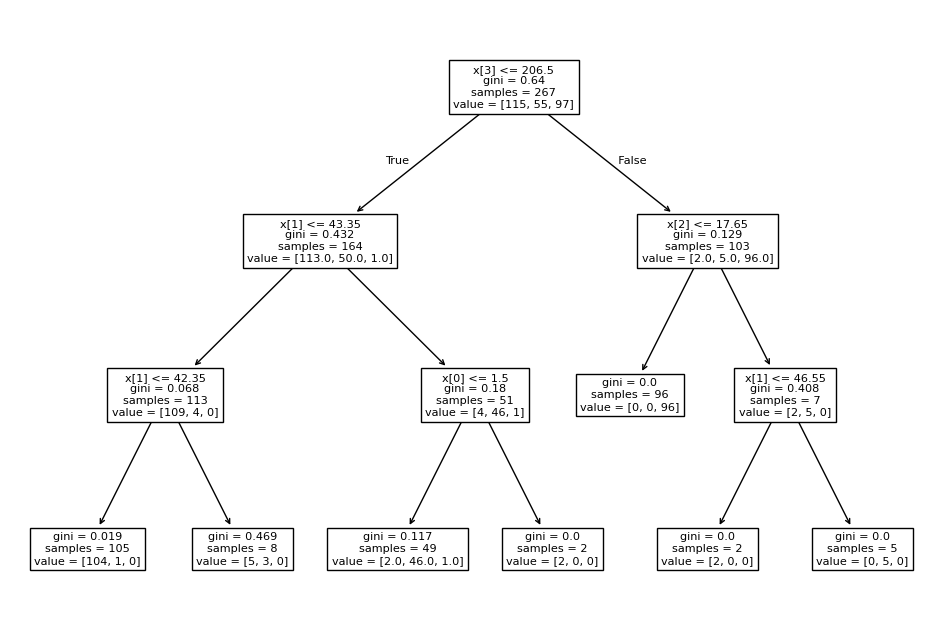

In [26]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [29]:
#f
print("Confusion Matrix Entropy")
cm = confusion_matrix(y_test, y_pred_en)
cm


Confusion Matrix Entropy


array([[30,  1,  0],
       [ 1, 12,  0],
       [ 0,  0, 23]])

In [30]:
print("Confusion Matrix Gini")
cy = confusion_matrix(y_test, y_pred_gini)
cy

Confusion Matrix Gini


array([[31,  0,  0],
       [ 1, 12,  0],
       [ 0,  0, 23]])

In [31]:
#g
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



In [32]:
print("Classification Report gini")
print(classification_report(y_test, y_pred_gini))

Classification Report gini
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [33]:
#h
print("dalam kasus ini klasifikasi menggunakan gini lebih akurat daripada klasifikasi menggunakan entropy (0.99 vs 0.97)")

dalam kasus ini klasifikasi menggunakan gini lebih akurat daripada klasifikasi menggunakan entropy (0.99 vs 0.97)


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [34]:
#a
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [36]:
#b
nb_y_pred = nb_classifier.predict(x_test)

In [38]:
#c
print("Model accuracy  score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test,nb_y_pred)))

#d


cm = confusion_matrix(y_test, nb_y_pred)
cm

Model accuracy  score with Naive Bayes: 1.0000


array([[31,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 23]])

In [39]:
#e
print("Classification Report")
print(classification_report(y_test, nb_y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [40]:
#f
print("klasifikasi menggunakan metode Naive Bayes lebih akurat daripada pakai entropy dan gini dapat dilihat akurasinya mencapai 1.00")

klasifikasi menggunakan metode Naive Bayes lebih akurat daripada pakai entropy dan gini dapat dilihat akurasinya mencapai 1.00


Good Luck :)